# **Import Library**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

# **Load File**

In [3]:
df=pd.read_csv("drive/MyDrive/goodreads_data.csv")

In [4]:
df

,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
0,0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...
2,2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...
3,3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,"3,488,438",https://www.goodreads.com/book/show/48855.The_...
4,4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,"3,575,172",https://www.goodreads.com/book/show/170448.Ani...
...,...,...,...,...,...,...,...,...
9995,9995,"Breeders (Breeders Trilogy, #1)",Ashley Quigley,How far would you go? If human society was gen...,"['Dystopia', 'Science Fiction', 'Post Apocalyp...",3.44,276,https://www.goodreads.com/book/show/22085400-b...
9996,9996,Dynamo,Eleanor Gustafson,Jeth Cavanaugh is searching for a new life alo...,[],4.23,60,https://www.goodreads.com/book/show/20862902-d...
9997,9997,The Republic of Trees,Sam Taylor,This dark fable tells the story of four Englis...,"['Fiction', 'Horror', 'Dystopia', 'Coming Of A...",3.29,383,https://www.goodreads.com/book/show/891262.The...
9998,9998,"Waking Up (Healing Hearts, #1)",Renee Dyer,For Adriana Monroe life couldn’t get any bette...,"['New Adult', 'Romance', 'Contemporary Romance...",4.13,263,https://www.goodreads.com/book/show/19347252-w...


In [5]:
df.describe()

,Unnamed: 0,Avg_Rating
count,10000.00000,10000.000000
mean,4999.50000,4.068577
std,2886.89568,0.335359
min,0.00000,0.000000
25%,2499.75000,3.880000
50%,4999.50000,4.080000
75%,7499.25000,4.260000
max,9999.00000,5.000000


In [6]:
df["Unnamed: 0"]=df['Unnamed: 0'].fillna(0)

In [7]:
df.Avg_Rating=df.Avg_Rating.astype(int)

**Standardization and Normalization doesn't work on categorical data , it works only with numerical data**

# **Standardization**


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10000 non-null  int64 
 1   Book         10000 non-null  object
 2   Author       10000 non-null  object
 3   Description  9923 non-null   object
 4   Genres       10000 non-null  object
 5   Avg_Rating   10000 non-null  int64 
 6   Num_Ratings  10000 non-null  object
 7   URL          10000 non-null  object
dtypes: int64(2), object(6)
memory usage: 625.1+ KB


In [9]:
df=df.drop(["Book","Author","Description","Genres","URL"],axis=1)

In [10]:
df=df.drop(["Num_Ratings"],axis=1)

In [11]:
df.isnull().sum()

Unnamed: 0    0
Avg_Rating    0
dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(df.drop("Unnamed: 0",axis=1),df["Unnamed: 0"],test_size=0.2)

In [14]:
x_train.shape,y_train.shape

((8000, 1), (8000,))

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
df.describe()

,Unnamed: 0,Avg_Rating
count,10000.00000,10000.000000
mean,4999.50000,3.618900
std,2886.89568,0.523536
min,0.00000,0.000000
25%,2499.75000,3.000000
50%,4999.50000,4.000000
75%,7499.25000,4.000000
max,9999.00000,5.000000


In [17]:
sc=StandardScaler()

In [18]:
sc.fit(x_train)

StandardScaler()

In [19]:
x_train_scaler=sc.transform(x_train)
x_test_scaler=sc.transform(x_test)

In [20]:
sc.mean_

array([3.61725])

In [21]:
x_train_scaler

array([[-1.17757973],
       [ 0.73020436],
       [-1.17757973],
       ...,
       [-1.17757973],
       [ 0.73020436],
       [ 0.73020436]])

In [22]:
x_test_scaler

array([[-1.17757973],
       [ 0.73020436],
       [ 0.73020436],
       ...,
       [ 0.73020436],
       [ 0.73020436],
       [-1.17757973]])

In [23]:
x_train_scaler=pd.DataFrame(x_train_scaler,columns=x_train.columns)

In [24]:
x_train_scaler

,Avg_Rating
0,-1.177580
1,0.730204
2,-1.177580
3,0.730204
4,-1.177580
...,...
7995,2.637988
7996,-1.177580
7997,-1.177580
7998,0.730204


In [25]:
x_test_scaler=pd.DataFrame(x_test_scaler,columns=x_test.columns)

In [26]:
x_test_scaler

,Avg_Rating
0,-1.177580
1,0.730204
2,0.730204
3,-1.177580
4,0.730204
...,...
1995,-1.177580
1996,0.730204
1997,0.730204
1998,0.730204


In [27]:
x_test_scaler.describe()

,Avg_Rating
count,2000.000000
mean,0.015739
std,0.993854
min,-6.900932
25%,-1.177580
50%,0.730204
75%,0.730204
max,2.637988


In [28]:
x_train_scaler.describe()

,Avg_Rating
count,8.000000e+03
mean,2.682299e-16
std,1.000063e+00
min,-6.900932e+00
25%,-1.177580e+00
50%,7.302044e-01
75%,7.302044e-01
max,2.637988e+00


In [29]:
import numpy as np


In [30]:
np.round(x_train_scaler.describe(),1)

,Avg_Rating
count,8000.0
mean,0.0
std,1.0
min,-6.9
25%,-1.2
50%,0.7
75%,0.7
max,2.6


In [31]:
import matplotlib.pyplot as plt

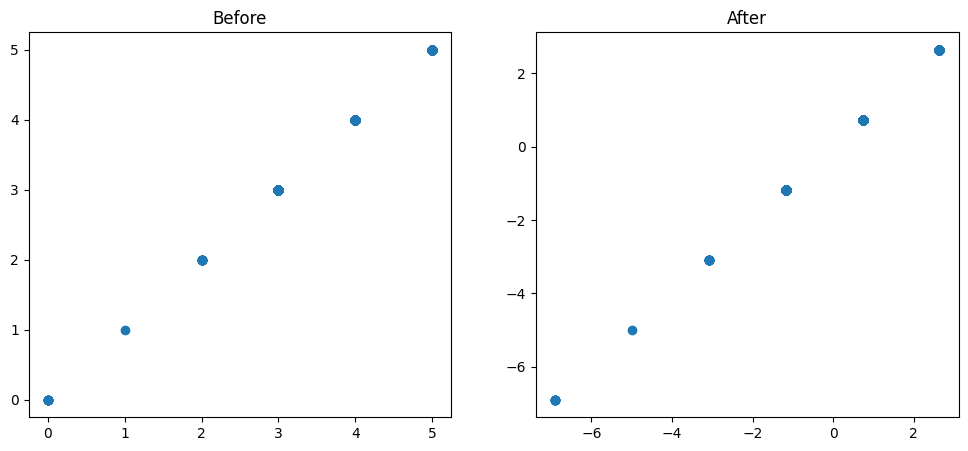

In [32]:
fig,(a1,a2)=plt.subplots(ncols=2,figsize=(12,5))
a1.scatter(x_train["Avg_Rating"],x_train["Avg_Rating"])
a1.set_title("Before")
a2.scatter(x_train_scaler["Avg_Rating"],x_train_scaler["Avg_Rating"])
a2.set_title("After")
plt.show()

# **Normalization**

Robust is used when data has outliners


MinMax are used when min or max value is known 


MaxAbs is used when there are many zero values in data

# **MinMax-Scaler**

# **Import Library**

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
mm=MinMaxScaler()

In [36]:
mm.fit(x_train,y_train)

MinMaxScaler()

In [37]:
x_train_scaler=mm.transform(x_train)
x_test_scaler=mm.transform(x_test)

In [38]:
x_train_scaler

array([[0.6],
       [0.8],
       [0.6],
       ...,
       [0.6],
       [0.8],
       [0.8]])

In [39]:
x_test_scaler

array([[0.6],
       [0.8],
       [0.8],
       ...,
       [0.8],
       [0.8],
       [0.6]])

In [40]:
x_train_scaler=pd.DataFrame(x_train_scaler,columns=x_train.columns)
x_test_scaler=pd.DataFrame(x_test_scaler,columns=x_test.columns)

In [41]:
x_train_scaler

,Avg_Rating
0,0.6
1,0.8
2,0.6
3,0.8
4,0.6
...,...
7995,1.0
7996,0.6
7997,0.6
7998,0.8


In [42]:
x_test_scaler

,Avg_Rating
0,0.6
1,0.8
2,0.8
3,0.6
4,0.8
...,...
1995,0.6
1996,0.8
1997,0.8
1998,0.8


In [43]:
np.round(x_train_scaler.describe(),1)

,Avg_Rating
count,8000.0
mean,0.7
std,0.1
min,0.0
25%,0.6
50%,0.8
75%,0.8
max,1.0


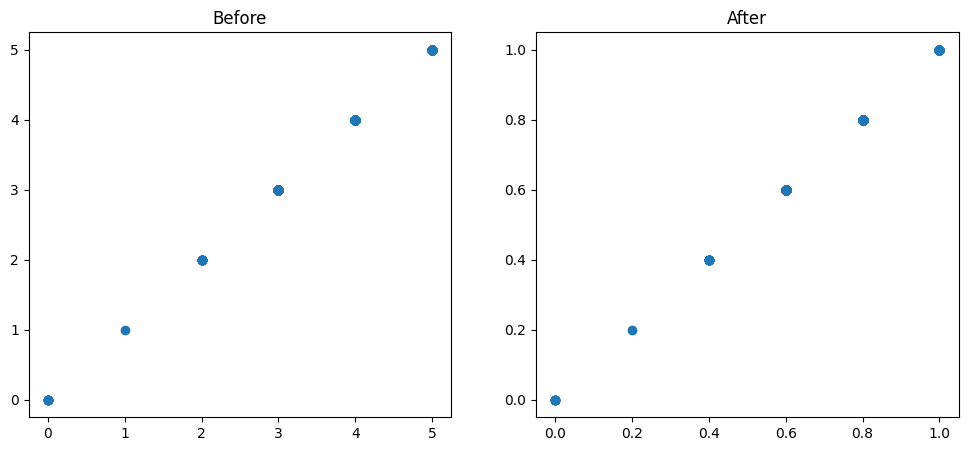

In [44]:
fig,(a1,a2)=plt.subplots(ncols=2,figsize=(12,5))
a1.scatter(x_train["Avg_Rating"],x_train["Avg_Rating"])
a1.set_title("Before")
a2.scatter(x_train_scaler["Avg_Rating"],x_train_scaler["Avg_Rating"])
a2.set_title("After")
plt.show()

# **MaxAbsScaler**

# **Import Library**

In [45]:
from sklearn.preprocessing import MaxAbsScaler

In [46]:
ma=MinMaxScaler()

In [47]:
ma.fit(x_train,y_train)

MinMaxScaler()

In [50]:
x_train_scaler=ma.transform(x_train)
x_test_scaler=ma.transform(x_test)

In [51]:
x_train_scaler=pd.DataFrame(x_train_scaler,columns=x_train.columns)
x_test_scaler=pd.DataFrame(x_test_scaler,columns=x_test.columns)

In [52]:
x_train_scaler

,Avg_Rating
0,0.6
1,0.8
2,0.6
3,0.8
4,0.6
...,...
7995,1.0
7996,0.6
7997,0.6
7998,0.8


In [53]:
x_test_scaler

,Avg_Rating
0,0.6
1,0.8
2,0.8
3,0.6
4,0.8
...,...
1995,0.6
1996,0.8
1997,0.8
1998,0.8


In [54]:
np.round(x_train_scaler.describe(),1)

,Avg_Rating
count,8000.0
mean,0.7
std,0.1
min,0.0
25%,0.6
50%,0.8
75%,0.8
max,1.0


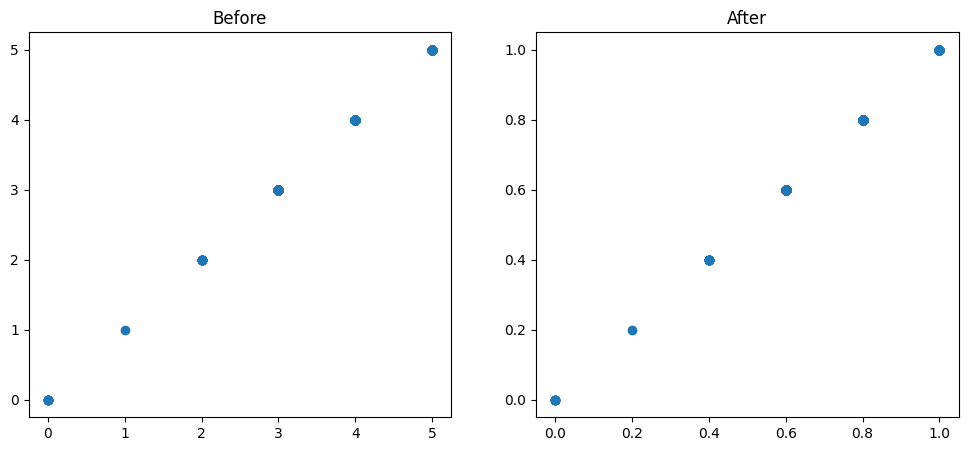

In [55]:
fig,(a1,a2)=plt.subplots(ncols=2,figsize=(12,5))
a1.scatter(x_train["Avg_Rating"],x_train["Avg_Rating"])
a1.set_title("Before")
a2.scatter(x_train_scaler["Avg_Rating"],x_train_scaler["Avg_Rating"])
a2.set_title("After")
plt.show()

# **Robust Scaler**

# **Import Library**

In [56]:
from sklearn.preprocessing import RobustScaler

# **Create Object**

In [57]:
ro=RobustScaler()

In [60]:
ro.fit(x_train,y_train)

RobustScaler()

In [61]:
x_train_scaler=ro.transform(x_train)
x_test_scaler=ro.transform(x_test)

In [62]:
x_train_scaler=pd.DataFrame(x_train_scaler,columns=x_train.columns)
x_test_scaler=pd.DataFrame(x_test_scaler,columns=x_test.columns)

In [63]:
np.round(x_train_scaler.describe(),1)

,Avg_Rating
count,8000.0
mean,-0.4
std,0.5
min,-4.0
25%,-1.0
50%,0.0
75%,0.0
max,1.0


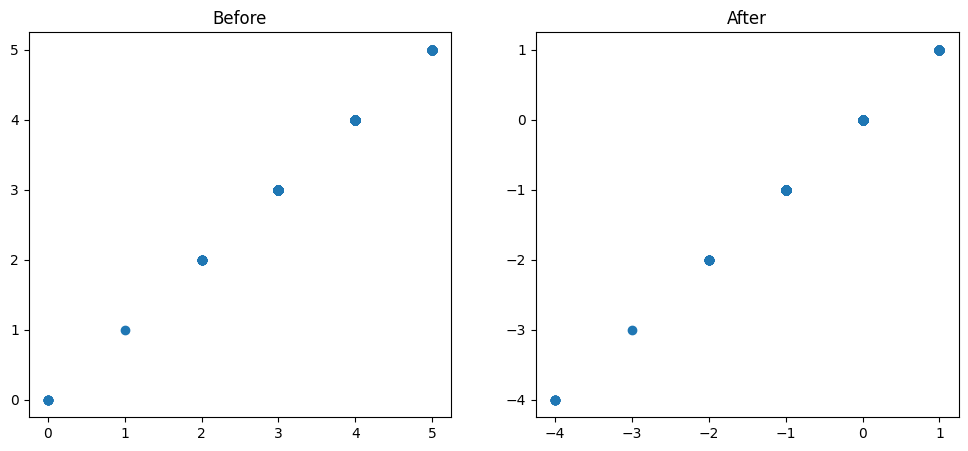

In [64]:
fig,(a1,a2)=plt.subplots(ncols=2,figsize=(12,5))
a1.scatter(x_train["Avg_Rating"],x_train["Avg_Rating"])
a1.set_title("Before")
a2.scatter(x_train_scaler["Avg_Rating"],x_train_scaler["Avg_Rating"])
a2.set_title("After")
plt.show()